In [2]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation # import animation support

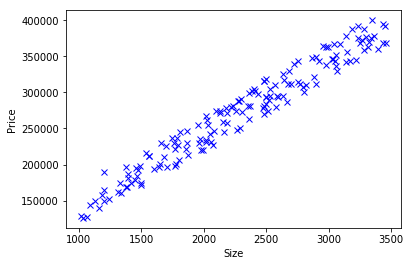

In [3]:
# generation some house sizes between 1000 and 3500 (typical sq ft of houses)
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house)

# Generate house prices from house size with a random noise added
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_house)

# Plot generated house and size
plt.plot(house_size, house_price, "bx") # bx = blue x
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [4]:
# you need to normalize values to prevent under/overflows.
def normalize(array):
    return (array - array.mean()) / array.std()

In [6]:
# 1. Prepared Data
# Define number of training samples. 0.7 = 70%. We can take the first 70% since the values are randomized
num_train_samples = int(math.floor(num_house * 0.7))

# Define training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asanyarray(house_price[:num_train_samples])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

# Define test data
test_house_size = np.asarray(house_size[num_train_samples:])
test_house_price = np.asanyarray(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

# Set up the TensorFlow placeholder that get updated as we descend down the gradient
tf_house_size = tf.placeholder(tf.float32, name='house_size')
tf_price = tf.placeholder(tf.float32, name='price')

# Define the variables holding the size_factor and price we set during training.
# We intialize them to some random values based on the normal distribution.
tf_size_factor = tf.Variable(np.random.randn(), name='size_factor')
tf_price_offset = tf.Variable(np.random.randn(), name='price_offset')

In [7]:
# 2. Inference
# Define the operations for the predicting values
# Notice, the use of the tensorflow add and multiply operations.
# AND the tensorflow methods understand how to deal with
# methods.
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

# 3. Loss Measurement
# Define the Loss Fuction(how much error) - Mean squared error
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred - tf_price, 2)) /(2 * num_train_samples)

# Optimizer learning rate. The size of the steps down the gradient
learning_rate = 0.1

# 4. Optimizer to Minimize Loss
# Define a Gradient descent optimizer that will minimize the loss defined in the operation "cost"
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

# Initializing the variables
init = tf.global_variables_initializer()

('iteration #:', '0002', 'cost=', '0.720058978', 'size_factor=', 0.091779955, 'price_offset=', -0.78197587)
('iteration #:', '0004', 'cost=', '0.488989949', 'size_factor=', 0.25305909, 'price_offset=', -0.6400547)
('iteration #:', '0006', 'cost=', '0.334198922', 'size_factor=', 0.38506955, 'price_offset=', -0.52387947)
('iteration #:', '0008', 'cost=', '0.230510592', 'size_factor=', 0.49312279, 'price_offset=', -0.42877954)
('iteration #:', '0010', 'cost=', '0.161057353', 'size_factor=', 0.58156669, 'price_offset=', -0.35093099)
('iteration #:', '0012', 'cost=', '0.114538930', 'size_factor=', 0.65396035, 'price_offset=', -0.28720489)
('iteration #:', '0014', 'cost=', '0.083384469', 'size_factor=', 0.71321601, 'price_offset=', -0.23503916)
('iteration #:', '0016', 'cost=', '0.062521778', 'size_factor=', 0.76171756, 'price_offset=', -0.19233663)
('iteration #:', '0018', 'cost=', '0.048552584', 'size_factor=', 0.80141753, 'price_offset=', -0.1573807)
('iteration #:', '0020', 'cost=', '0.0

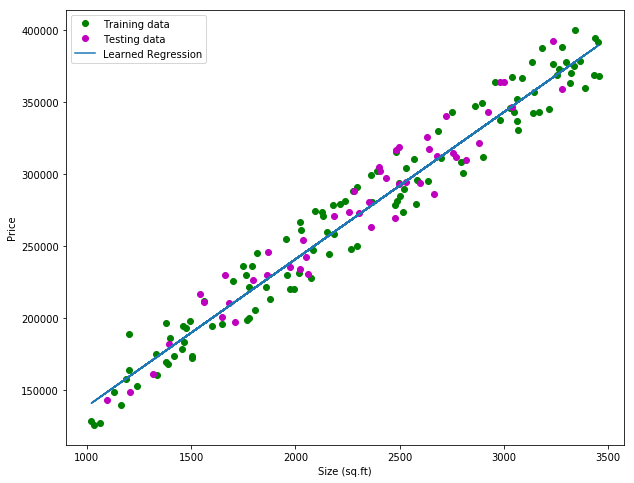

In [9]:
# Launch the graph in the session
with tf.Session() as sess:
    sess.run(init)

    # set how often to display the training progress and number of training iterations
    display_every = 2
    num_training_iter = 50

    # keep iterating the training data
    for iteration in range(num_training_iter):

        # Fit all training data
        for (x, y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})

        # Display current status
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
            print("iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c), \
                "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))         

    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')

    # Plot of the training and test data, and learned regression

    # Get values used to normalized data so we can denormalize data back to its original scale
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_price_mean = train_price.mean()
    train_price_std = train_price.std()

    # Plot the graph
    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel('Price')
    plt.xlabel('Size (sq.ft)')
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
            (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
            label='Learned Regression')

    plt.legend(loc='upper left')
    plt.show()